---

# Compactified  $\phi^2$  Inflation

### (This is the Press-Version)
---

---
**Author**:      Efrain Torres-Lomas 

**Email**:       ``efrain@fisica.ugto.mx``

**Github**:      https://github.com/elchinot7

**Bitbucket**:   https://bitbucket.org/elchinot7/pyncare

**Date**:        September 2016

---

## Note:
#### Here I will use the ``Pyncare`` Python package.

You can get it by doing:

    git clone https://elchinot7@bitbucket.org/elchinot7/pyncare.git

To install:

    python setup.py install
    

## Importing ``pyncare`` and other packages 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from collections import OrderedDict

#from pyncare.models import compact_dyn_sys_phi2
from pyncare.utils import plot_latitude
from pyncare import PoincareCompact

%matplotlib notebook

import seaborn as sns
sns.set()
sns.set_context("talk") # paper, notebook, talk, and poster


# The Model:

$$V=\frac{1}{2}m^2\phi^2$$

## Compactified over the Poincaré Sphere:

In [2]:
def compact_dyn_sys_phi2(init, t=None, modelpars=[]):
        if t is None:
            t = 1.0  # This is used to allows a call from "plot_vector_flow()"
        X = init[0]
        Y = init[1]
        # the model equations
        Z = np.sqrt(1.0 - X**2.0 - Y**2.0)
        A = 3.0 * Y * np.sqrt(X**2.0 + Y**2.0) / Z
        X_dot = Y + X * Y * A
        Y_dot = -X + (Y**2.0 - 1.0) * A
        return [X_dot, Y_dot]

# Numerical Solution:

- Define the Dynamical System Object
- Solve & Plot the orbits
- Add the constraints plots

**New!** Now is ease to use different predefined color schemes!

Just set

    colors='colorscheme'

where 'colorscheme' is one of 

    [None, 'deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']


In [3]:
t = np.linspace(0.0, 30.0, 1000)

var_names = {'x': r'$X$', 'y': r'$Y$'}

arrow_pos = [2, 5, 10, 50, 100, 150, 200]

orbits = [{'vars': OrderedDict([('x', 0.0005), ('y', -0.999)]), 't': t, 'arrow_pos': arrow_pos, 'label': 'label0'},
          {'vars': OrderedDict([('x', 0.0005), ('y', 0.999)]), 't': t, 'arrow_pos': arrow_pos, 'label': 'label1'},
         ]

In [4]:
dynsys = PoincareCompact(model=compact_dyn_sys_phi2,
                         model_pars=[],
                         var_names=var_names,
                         Ndim=2,
                         orbits=orbits,
                         lines=None,
                         colors='black',
                         #colors='dark'
                         #colors='bright'
                         )

## Get info about de defined Dyn Sys 

In [10]:
print dynsys


This is a <<PoincareCompact>> object
-------------------------------------
Equations are given by function:
	compact_dyn_sys_phi2
Ndims :
	2
List of initial conditions:
	[x=0.0005, y=-0.999, ]
	[x=0.0005, y=0.999, ]




In [ ]:
#print dynsys._orbits

## Plot the varibles x - y  projected onto the Poincare Sphere

<IPython.core.display.Javascript object>


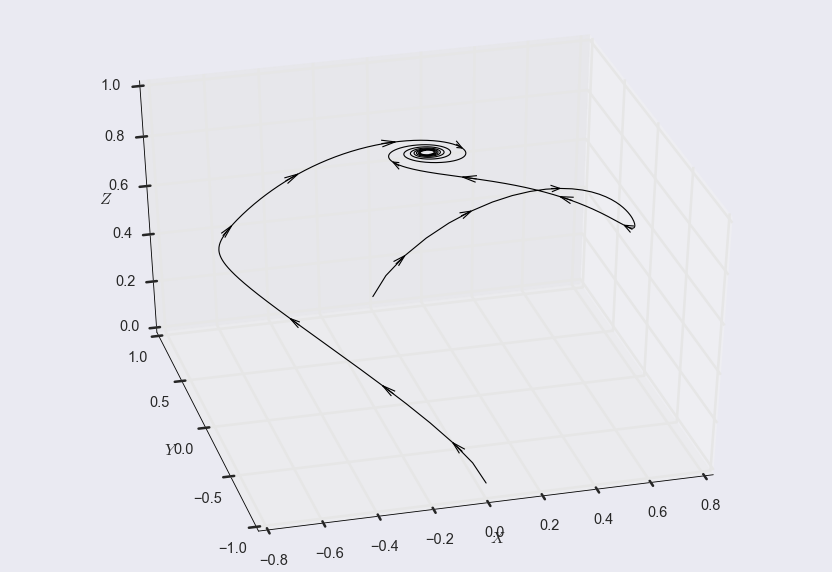

In [9]:
fig = plt.figure()
ax = Axes3D(fig)

dynsys.plot_orbits(ax=ax, vars_to_plot=['x', 'y'], lw=1)

## Orbits + Surface

<IPython.core.display.Javascript object>


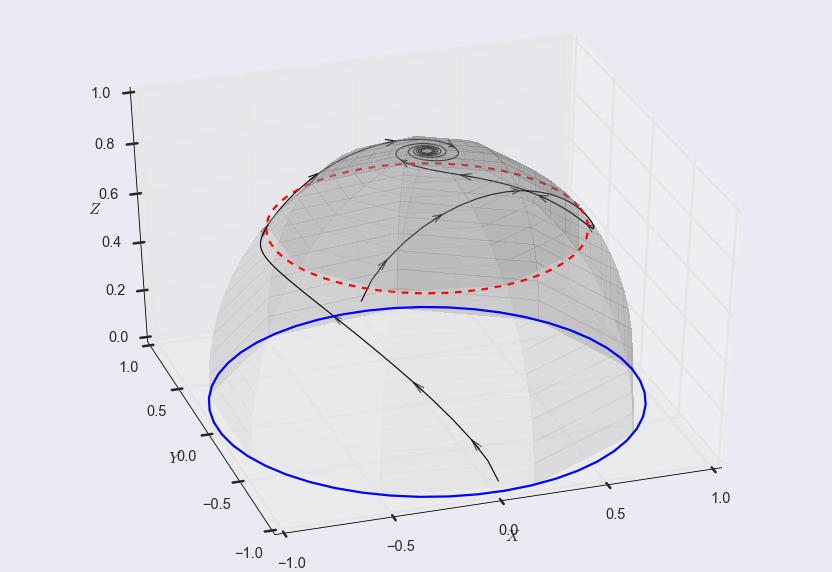

In [12]:
fig1 = plt.figure()
ax1 = Axes3D(fig1)

dynsys.plot_orbits(ax=ax1, vars_to_plot=['x', 'y'], lw=1)

dynsys.plot_poincare_surface(ax1, phi_i=0, phi_f=2*np.pi,
                             theta_i=0, theta_f=np.pi/4,
                             res=10, color='0.7', alpha=0.3)

dynsys.plot_poincare_surface(ax1, phi_i=0, phi_f=2*np.pi,
                             theta_i=np.pi/4, theta_f=np.pi/2,
                             res=10, color='0.9', alpha=0.3)

dynsys.plot_equator(ax1, res=50, ls='-', lw=2, color='b', is_projection=False)

plot_latitude(ax1, theta_0=np.pi/4, res=50, ls='--', lw=2, color='r')
plt.savefig('./plots/phi2_poincare.png')

## The Final Plot

![](./plots/phi2_poincare.png)

![](./plots/movie_phi2_inflation.gif)